In [1]:
!pip install nltk

In [2]:
!pip install wordcloud

In [3]:
#preprocessing NLP Data
#--removing non-alphabetic characters
# --lowering the format
# --tokenization
# --remove stop words
# --stemming/lemitization
# --spell correction

In [4]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from autocorrect import Speller

In [5]:
data = pd.read_csv(r'C:\Users\bhavy\Downloads\Spam-Classifier-using-naive-bayes-main\Spam-Classifier-using-naive-bayes-main\spam.csv')

In [6]:
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [7]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [8]:
data.drop(['Unnamed: 2' , 'Unnamed: 3', 'Unnamed: 4'],axis =1, inplace = True)

In [9]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
data.rename(columns ={'v1': 'labels', 'v2':'messages'}, inplace = True)

In [11]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
#lets visualize the spam words

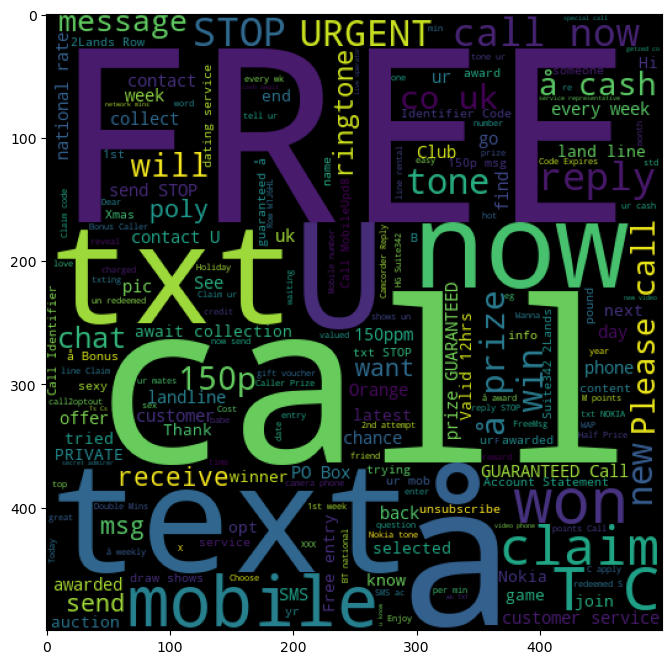

In [13]:
spam_words = ' '.join(list(data[data['labels']=='spam']['messages']))
spam_wc = WordCloud(width=500, height=500).generate(spam_words)
plt.figure(figsize=(10,8))
plt.imshow(spam_wc)
plt.show()


In [14]:
#lets visualize the ham words

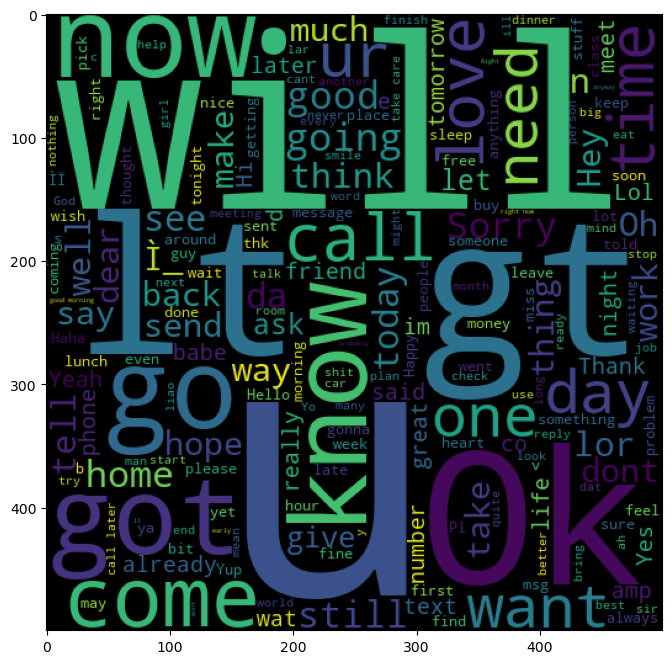

In [15]:
ham_words = ' '.join(list(data[data['labels']=='ham']['messages']))
ham_wc = WordCloud(width=500, height=500).generate(ham_words)
plt.figure(figsize=(10,8))
plt.imshow(ham_wc)
plt.show()

In [16]:
#preprocessing the data


In [17]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
#preprocessing the data

In [19]:
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
data.shape

(5572, 2)

In [21]:
import re
spell = Speller()
stemmer = PorterStemmer()
from tqdm import tqdm

In [22]:
#encoding our labels
data['labels'] = data['labels'].apply(lambda x: 1 if x=='spam' else 0)

In [23]:
new_data = []
for i in tqdm(range(data.shape[0])):
    lines = data.iloc[i,1]
    #removing non-alphabetic characters
    lines = re.sub('[^A-Za-z]', ' ', lines)
    #lowering the format
    lines = lines.lower()
    #tokenization
    tokenized_lines = word_tokenize(lines)
    #remove stop words and stemming/lemitization and spell correction
    processed_lines =[]
    for i in tokenized_lines:
        if i not in set(stopwords.words('english')):
            processed_lines.append(spell(stemmer.stem(i)))
            
            
    final_lines = ' '.join(processed_lines)
    new_data.append(final_lines)
    

100%|██████████████████████████████████████████████████████████████████████████████| 5572/5572 [03:47<00:00, 24.52it/s]


In [24]:
lines

'rofl  its true to its name'

In [25]:
tokenized_lines

['rofl', 'its', 'true', 'to', 'its', 'name']

In [26]:
processed_lines

['roll', 'true', 'name']

In [27]:
new_data

['go during point crazy avail bugs n great world la e buffet cine got amor wat',
 'ok lar joke if u oni',
 'free entry wki comp win fa cup final tt st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though',
 'frees hey dark week word back like fun still tb ok xxx std chg send rev',
 'even brother like speak treat like aid patent',
 'per request well well oru minnaminungint nurungu vietnam set callertun caller press copy friend callertun',
 'winner value network custom select received prize reward claim call claim code kl valid hour',
 'mobil month u r entity update latest colour mobil camera free call mobil update co free',
 'gon na home soon want talk stuff anymore tonight k cri enough today',
 'six chance win cash pound txt cs send cost p day day stand apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www duk net lccltd box link rw',
 'search right word thank breathe pro

In [28]:
len(new_data)

5572

In [29]:
Y = data['labels']
Y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: labels, Length: 5572, dtype: int64

In [30]:
#splitting the data into training and testing

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test, Y_train, Y_test= train_test_split(new_data, Y, test_size=0.25)

In [33]:
X_train

['k girl wait recent ah',
 'contact date service someone know find call land line box w tg p',
 'fuer home andrew dad',
 'ok r meet later',
 'future plan tomorrow result today best present enjoy future',
 'ye glad made',
 'right pick open tonight',
 'look fucking time fuck think',
 'plan',
 'worry hope photo shoot went well spin fun work',
 'go write msg put dictionary mode cover screen hand press lt gt gentle remove ur hand interest',
 'yeah fine get ok',
 'told dr apps next week think gon na die told check not worry listen',
 'get office england poli ringen colour flag yer mobil tonight game text tone flag output txt eng stop box w wx',
 'yeah go bed back midnight',
 'horrible u eat mac eat u forgot abt already rite u take long reply the took b b prepare wat shall eat',
 'beauty truth gravity read care heart feel light someone feel heavy someone lead goodman',
 'think da wil',
 'all wont play first two odi',
 'cancel yeah baby well sound import understand darwin give ring later font 

In [34]:
len(X_train)

4179

In [35]:
len(X_test)

1393

In [36]:
len(Y_train)

4179

In [37]:
len(Y_test)

1393

In [38]:
Y_test

5070    0
301     0
65      1
1418    0
5053    1
       ..
196     0
4933    0
4998    0
1842    0
2573    1
Name: labels, Length: 1393, dtype: int64

In [39]:
#vectorization(BOW)

In [40]:
from sklearn.feature_extraction.text import CountVectorizer #tf-idf

In [41]:
matrix = CountVectorizer()
X_train_vect = matrix.fit_transform(X_train).toarray()
X_test_vect = matrix.transform(X_test).toarray()

In [42]:
X_train_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [43]:
#Lets train our model(Naive Bayes)

In [44]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [45]:
model.fit(X_train_vect, Y_train)

GaussianNB()

In [46]:
model.classes_

array([0, 1], dtype=int64)

In [47]:
Y_pred = model.predict(X_test_vect)

In [48]:
Y_pred

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [50]:
accuracy_score(Y_test, Y_pred)* 100

86.50394831299354

In [51]:
confusion_matrix(Y_test, Y_pred)

array([[1028,  176],
       [  12,  177]], dtype=int64)

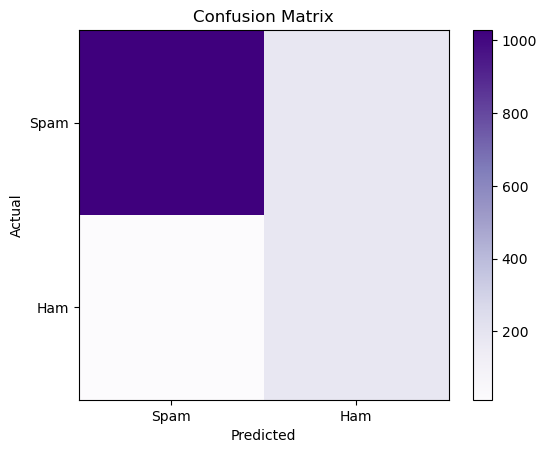

In [58]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Purples)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Spam', 'Ham'])
plt.yticks(tick_marks, ['Spam', 'Ham'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
